In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("./data/passSecData/data.csv", on_bad_lines='skip')

In [3]:
len(data)

669640

In [4]:
data.dropna(inplace=True)

In [5]:
len(data)

669639

In [6]:
df_0 = data[data.scores==0]
df_1 = data[data.scores==1]
df_2 = data[data.scores==2]
df_3 = data[data.scores==3]
df_4 = data[data.scores==4]

In [7]:
from sklearn.utils import resample
df_majority_downsampled = resample(df_1, replace=False, n_samples=83137, random_state=123)

In [8]:
df_downsampled = pd.concat([df_majority_downsampled, df_0,df_2])


In [9]:
df_downsampled.strength.value_counts()

strength
0    89701
1    83137
2    83137
Name: count, dtype: int64

In [10]:
data=df_downsampled

In [11]:
data = np.array(data)

In [12]:
def remove_non_ascii(text):
    return text.encode('ascii', 'ignore').decode('ascii')

In [13]:
# remove all passwords with non-permitted chars
import re
cleanData=[]
regex = "^([a-z])([A-Z])(\d)([@$!%*#?&])$"
for i in data:
    t=remove_non_ascii(str(i[0]))
    cleanData.append([t,i[1]])
    

In [14]:
for i in cleanData:
    if len(str(i[0]))<6 or len(str(i[0]))>30:
        cleanData.remove(i)

In [15]:
import random
random.shuffle(cleanData)

In [16]:
X=[pw[0] for pw in cleanData]
y=[pw[1]for pw in cleanData]

In [17]:
X

['jay880507',
 'wildaala2903',
 'ZR1EtGzI3NQYnGee',
 'placek1',
 'UdicAwizIkEm844',
 '854NEVUvusEpYJE',
 'delger2009',
 '511014you',
 '2xfneqp',
 'zhu000',
 'awa9m1',
 'gevorg1997',
 'sup3rMr.$D0gXD',
 'manoronha18',
 '24k4r14159753',
 'farrand123',
 'ylaroc968',
 'maria80',
 'kamfret69',
 'm1ftah',
 'zjc666',
 'margav97',
 'FvehqZzU2OAbHlMP',
 'o0srav2',
 'bartec1',
 'LQz182TI2MQuXnES',
 'kk2435',
 '72h578q2',
 'fl6buUzM1MwFrZ5h',
 'vickey1',
 'yuri20',
 'zB6OT9zM0Mg9q8Zi',
 'dapat21',
 '22ivu4ohina6a',
 'cesna172',
 'shocptxre0',
 'iz6eaqu',
 'oyQG7UjEzNgcWhfS',
 '6QapoVjQ5NQOTVnV',
 '6xud8uy',
 'lolman67',
 'petera1',
 'KCDLFoTA2OAuOppt',
 '4HcVOKzQ5Mw6Sjef',
 '3QbBnGTY5NQW0MTu',
 'ulas07',
 '063809020**',
 'cxd314408926',
 'asd...',
 'Kohlmann214365',
 'b2HtFmDU4MQNW9uy',
 '1danum',
 'MBQCyRTQ3MAqlSU8',
 '958wETekEBUSeJA',
 'al1nush',
 'Heymelstinkt1338*',
 'ayhan-',
 'flame1979',
 '271QiMoXuSUzob',
 '33645673.melissa',
 'jcap01',
 'bAfarixUTEkA818',
 'unaya08',
 '156046984p',
 'Z3

In [18]:
def toChar(inp):
    chars=[]
    for i in inp:
        chars.append(i)
    return chars

In [19]:
X=[toChar(i) for i in X]

In [20]:
X

[['j', 'a', 'y', '8', '8', '0', '5', '0', '7'],
 ['w', 'i', 'l', 'd', 'a', 'a', 'l', 'a', '2', '9', '0', '3'],
 ['Z',
  'R',
  '1',
  'E',
  't',
  'G',
  'z',
  'I',
  '3',
  'N',
  'Q',
  'Y',
  'n',
  'G',
  'e',
  'e'],
 ['p', 'l', 'a', 'c', 'e', 'k', '1'],
 ['U', 'd', 'i', 'c', 'A', 'w', 'i', 'z', 'I', 'k', 'E', 'm', '8', '4', '4'],
 ['8', '5', '4', 'N', 'E', 'V', 'U', 'v', 'u', 's', 'E', 'p', 'Y', 'J', 'E'],
 ['d', 'e', 'l', 'g', 'e', 'r', '2', '0', '0', '9'],
 ['5', '1', '1', '0', '1', '4', 'y', 'o', 'u'],
 ['2', 'x', 'f', 'n', 'e', 'q', 'p'],
 ['z', 'h', 'u', '0', '0', '0'],
 ['a', 'w', 'a', '9', 'm', '1'],
 ['g', 'e', 'v', 'o', 'r', 'g', '1', '9', '9', '7'],
 ['s', 'u', 'p', '3', 'r', 'M', 'r', '.', '$', 'D', '0', 'g', 'X', 'D'],
 ['m', 'a', 'n', 'o', 'r', 'o', 'n', 'h', 'a', '1', '8'],
 ['2', '4', 'k', '4', 'r', '1', '4', '1', '5', '9', '7', '5', '3'],
 ['f', 'a', 'r', 'r', 'a', 'n', 'd', '1', '2', '3'],
 ['y', 'l', 'a', 'r', 'o', 'c', '9', '6', '8'],
 ['m', 'a', 'r', 'i', 'a

In [21]:
train_text, test_text, train_y, test_y = train_test_split(X,y,test_size = 0.2)

In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
MAX_NB_WORDS = 93

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(train_text)
sequences = tokenizer.texts_to_sequences(train_text)
sequences_test = tokenizer.texts_to_sequences(test_text)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

d:\Projects\Thesis\workspaceThesis\myEnv\lib\site-packages\keras\src\legacy\preprocessing\text.py:98: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn(


Found 71 unique tokens.


In [23]:
index_to_word = dict((i, w) for w, i in tokenizer.word_index.items())

In [39]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [24]:
index_to_word

{1: 'a',
 2: '1',
 3: 'e',
 4: 'o',
 5: 'i',
 6: 'n',
 7: 'm',
 8: '2',
 9: 't',
 10: '0',
 11: 'r',
 12: 's',
 13: 'u',
 14: 'd',
 15: 'l',
 16: '3',
 17: 'y',
 18: 'g',
 19: 'k',
 20: '9',
 21: 'c',
 22: '4',
 23: '5',
 24: 'w',
 25: 'j',
 26: 'z',
 27: 'h',
 28: 'q',
 29: 'p',
 30: '8',
 31: 'b',
 32: '7',
 33: '6',
 34: 'v',
 35: 'f',
 36: 'x',
 37: '.',
 38: '@',
 39: '-',
 40: '_',
 41: '!',
 42: '*',
 43: '#',
 44: '$',
 45: '/',
 46: ' ',
 47: '+',
 48: '&',
 49: '?',
 50: ';',
 51: '%',
 52: ')',
 53: '^',
 54: '(',
 55: '=',
 56: ']',
 57: '<',
 58: '[',
 59: '~',
 60: '>',
 61: '{',
 62: '|',
 63: '}',
 64: '\\',
 65: '`',
 66: '"',
 67: '\x7f',
 68: '\x1c',
 69: '\x12',
 70: '\x1b',
 71: '\x08'}

In [25]:
seq_lens = [len(s) for s in sequences]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

average length: 10.6
max length: 30


In [26]:
MAX_SEQUENCE_LENGTH = 30

# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)

In [27]:
from keras.utils import to_categorical
y_train = train_y
y_test = test_y

y_train = to_categorical(np.asarray(y_train))
y_test = to_categorical(np.asarray(y_test))
print('Shape of label tensor:', y_train.shape)

Shape of label tensor: (204501, 3)


In [28]:
y_train

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [29]:
x_train.shape

(204501, 30)

In [45]:
# Neural net model-
import tensorflow as tf
from keras import layers, models
from sklearn.model_selection import KFold

# Merge inputs and targets
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

acc_per_fold=[]
loss_per_fold=[]
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    model = models.Sequential()
    model.add(layers.Input((30,),dtype='int32'))
    model.add(layers.Embedding(input_dim=93,output_dim=10, input_length=30,trainable=True))
    model.add(layers.LSTM(64, return_sequences=True))
    model.add(layers.LSTM(32))
    model.add(layers.Dense(30,activation="relu"))
    model.add(layers.Dense(3,activation="softmax"))
    model.compile(optimizer='adam',
                loss="categorical_crossentropy",
                metrics=['accuracy'])
    
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=128,
              epochs=5,
              verbose=1)

    # Generate generalization metrics
    
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5


d:\Projects\Thesis\workspaceThesis\myEnv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1598/1598 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9499 - loss: 0.1206
Epoch 2/5
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9968 - loss: 0.0123
Epoch 3/5
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9999 - loss: 6.4702e-04
Epoch 4/5
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9999 - loss: 8.5946e-04
Epoch 5/5
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.9977 - loss: 0.0129
Score for fold 1: loss of 0.0009927304927259684; compile_metrics of 99.99021887779236%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9351 - loss: 0.1407
Epoch 2/5
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9994 - loss: 0.0032
Epoch 3/5
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9999 - loss: 8.6468e-04
Epoch 4/5
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9995 - loss: 0.0024
Epoch 5/5
159

In [54]:
scores

[0.0007781410240568221, 0.9999217391014099]

In [46]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.0009927304927259684 - Accuracy: 99.99021887779236%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.0004902886576019228 - Accuracy: 99.9941349029541%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.0006329922471195459 - Accuracy: 99.9941349029541%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.0008943508146330714 - Accuracy: 99.99021887779236%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.0007355269626714289 - Accuracy: 99.99021887779236%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 99.99178528785706 (+- 0.0019184526932341432)
> Loss: 0.0007491778349503874
---------

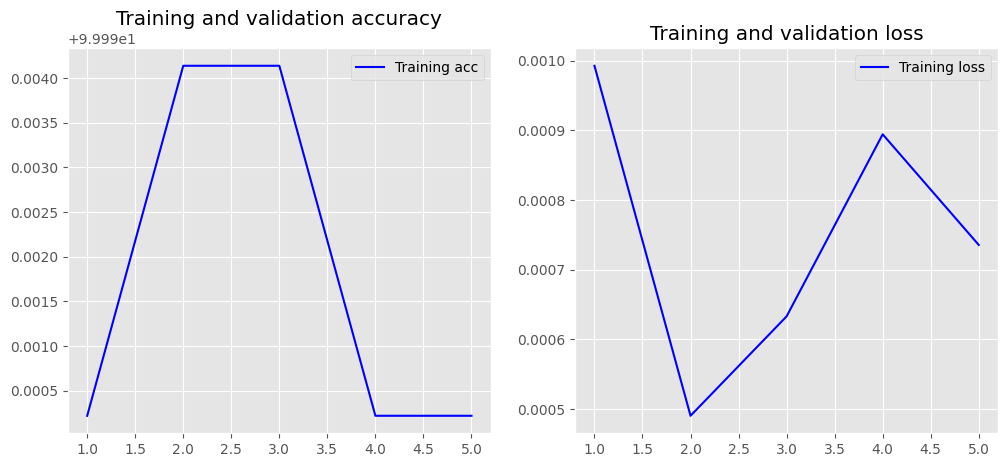

In [47]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = acc_per_fold
    loss = loss_per_fold
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
   # plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
   # plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(history)


In [48]:
from sklearn.metrics import roc_auc_score
output_test = model.predict(x_test)
print("test auc:", roc_auc_score(y_test,output_test,multi_class="ovr"))

1598/1598 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
test auc: 0.9999872468202856


In [40]:
model.save("./secModelv3.keras")

In [56]:
output_test[0:20]

array([[9.9962342e-01, 3.7626547e-04, 1.8339260e-07],
       [9.9957699e-01, 4.2273372e-04, 2.0830653e-07],
       [1.2034159e-09, 4.4507160e-06, 9.9999559e-01],
       [9.9991679e-01, 8.3210456e-05, 5.4101289e-08],
       [1.2101739e-09, 4.5084644e-06, 9.9999547e-01],
       [9.9991572e-01, 8.4216917e-05, 5.5029034e-08],
       [3.2728803e-08, 4.4060813e-04, 9.9955934e-01],
       [9.9967933e-01, 3.2058300e-04, 1.5385062e-07],
       [1.1981802e-09, 4.4484163e-06, 9.9999559e-01],
       [1.1982304e-09, 4.4836470e-06, 9.9999547e-01],
       [1.8834877e-05, 9.9994040e-01, 4.0735635e-05],
       [1.2324758e-09, 4.5546672e-06, 9.9999547e-01],
       [9.9968827e-01, 3.1163500e-04, 1.4963202e-07],
       [2.2707010e-05, 9.9990916e-01, 6.8137815e-05],
       [1.8606612e-05, 9.9994183e-01, 3.9586936e-05],
       [9.9991703e-01, 8.2928214e-05, 5.5392626e-08],
       [1.2049410e-09, 4.4315511e-06, 9.9999559e-01],
       [3.2866229e-10, 1.3396436e-06, 9.9999869e-01],
       [9.9991596e-01, 8.404

In [51]:
y_test

[2,
 1,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 2,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 2,
 2,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 0,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 0,
 1,
 0,
 2,
 1,
 2,
 0,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 0,
 0,
 1,
 2,
 1,
 0,
 2,
 2,
 0,
 1,
 1,
 2,
 2,
 0,
 1,
 2,
 2,
 1,
 0,
 1,
 2,
 1,
 0,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 0,
 0,
 2,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 1,
 0,
 2,
 2,
 0,
 2,
 2,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 0,


In [ ]:
model = models.Sequential()
model.add(layers.Input((30,),dtype='int32'))
model.add(layers.Embedding(input_dim=93,output_dim=10, input_length=30,trainable=True))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.LSTM(32))
model.add(layers.Dense(30,activation="relu"))
model.add(layers.Dense(3,activation="softmax"))
model.compile(optimizer='adam',
                loss="categorical_crossentropy",
                metrics=['accuracy'])

    # Fit data to model
history = model.fit(inputs[train], targets[train],
              batch_size=100,
              epochs=5,
              verbose=1)
